In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
class HP:
    pass

In [3]:
class ESN:
    def __init__(self,n_inputs=1):
        self.hp = HP()
        self.hp.alpha_force = 1.
        self.hp.N = 1000
        self.hp.g = 1.5
        self.hp.nl = np.tanh
        self.hp.dt=0.1
        self.hp.n_inputs = n_inputs
        self.reset()
    def reset(self):
        self.W=self.hp.g*np.random.normal(size=[self.hp.N,self.hp.N])/np.sqrt(self.hp.N)
        self.wfb=np.random.normal(size=[self.hp.N,1])
        self.win=np.random.normal(size=[self.hp.N,self.hp.n_inputs])
        self.wout=np.zeros([self.hp.N,1])
        self.x = np.random.normal(size=[self.hp.N,1]) 
        self.r = self.hp.nl(self.x)
    def step(self,f=None, uin=None):
        self.r = self.hp.nl(self.x)
        self.z =np.matmul(self.wout.transpose(),self.r)
        self.x *= 1-self.hp.dt
        self.x += self.hp.dt*(np.matmul(self.W,self.r) + self.wfb*(self.z if f is None else f) + (np.matmul(self.win,uin.reshape([-1,1])) if uin is not None else 0))
    def train_batch():
        error
    def train_FORCE(self, f_vec=None, uin_vec=None,tmax=None):
        rec = []
        self.FORCE_reset()
        for ti, (u,f) in enumerate(zip(uin_vec,f_vec)):
            self.step(uin=u)
            self.FORCE_step(f)
            rec.append(self.z)
        return rec
    def FORCE_reset(self):
            self.P = self.hp.alpha_force*np.eye(self.hp.N,self.hp.N)
    def FORCE_step(self,f):
            k = np.matmul(self.P,self.r)
            rPr = np.matmul(self.r.transpose(),k)
            c = 1.0/(1.0 + rPr)
            self.P -= np.matmul(k,np.transpose(k*c))
            e = self.z-f
            dw = -e*k*c
            self.wout += dw


In [4]:
t_vec = np.array(list(range(1000)))
f_vec = 2*np.sin(t_vec/10.0)
u_vec = np.matmul(np.zeros([2,1]),np.expand_dims(t_vec,axis=1).transpose())
u_vec = list(u_vec.transpose())

In [5]:
scene = np.zeros([28,28])

In [6]:
net = ESN(n_inputs=2)

In [7]:
z_rec_train = net.train_FORCE(f_vec=f_vec,uin_vec=u_vec)

In [8]:
rec = []
for kk in range(1000):
    net.step(uin=u_vec[kk])
    rec.append(net.z)
    
    

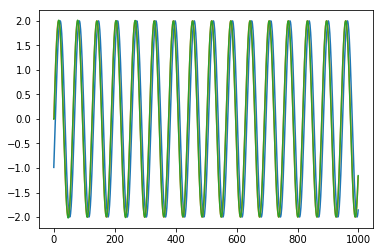

In [9]:
plt.plot(np.reshape(rec,[-1]))
plt.plot(f_vec)
plt.plot(np.reshape(z_rec_train,[-1]))

In [10]:
list(u_vec.transpose())

AttributeError: 'list' object has no attribute 'transpose'

In [ ]:
u_vec[1]

In [ ]:
kkk=np.array([10,10])